---
## K-Nearest Neighbors
### Dataset: Spotify Top Hits 2000–2019    
### Author: Arman Saxena  
---

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import your custom KNN implementation + utils functions
from spotiml.knn import KNNClassifier
from spotiml.utils import accuracy, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ------------------------------------------------------------
df = pd.read_csv("topsongs.csv")
df.head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


# 🎧 K-Nearest Neighbors (KNN)

KNN is one of the simplest classification algorithms:

1. Compute the distance between the input song and all training songs  
2. Select the **K closest neighbors**  
3. Predict the class based on majority vote (hit = 1, not-hit = 0)

Despite its simplicity, KNN often performs extremely well on structured datasets.

---

In [6]:
# ------------------------------------------------------------
# Create Hit vs. Non-Hit Label
# ------------------------------------------------------------
df["hit"] = (df["popularity"] >= 70).astype(int)

# ------------------------------------------------------------
# Select features for modeling
# ------------------------------------------------------------
features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo"
]

X = df[features].values
y = df["hit"].values

print("Feature shape:", X.shape)
print("Positive class percentage:", y.mean())

Feature shape: (2000, 9)
Positive class percentage: 0.3635


---
## Phase 1 — Data Preparation

We scale the data because KNN is **distance-based**, and features with larger numeric ranges (like tempo and loudness) would dominate the distance calculation if unscaled.

We perform:

- Train/test split (stratified)
- Standard scaling (fit only on the training set)
---

In [9]:
# ------------------------------------------------------------
# Train/Test Split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ------------------------------------------------------------
# Feature Scaling
# ------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train_scaled[:3]

array([[-1.22917369,  0.87721285,  1.49350532, -0.39742821, -0.24721326,
        -0.17729123,  1.10855775, -0.69460172,  0.34603468],
       [ 2.13091284, -2.46445698, -1.98192649,  4.36738143, -0.52814434,
        -0.17737407, -0.53528436,  0.06794413, -0.02131305],
       [ 1.866957  , -0.12986573, -0.43451326, -0.01275574, -0.3524179 ,
        -0.17737407,  0.32146386, -0.279488  ,  0.16445135]])

---
## Phase 2 — Training the KNN Model

We will train multiple K values and choose the best-performing one.
---

In [13]:
# ------------------------------------------------------------
# Evaluate K values from 1 to 15
# ------------------------------------------------------------
results = []

for k in range(1, 16):
    knn = KNNClassifier(k=k)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)

    acc = accuracy(y_test, y_pred)
    results.append((k, acc))

    print(f"K = {k} → Accuracy = {acc:.4f}")

K = 1 → Accuracy = 0.5950
K = 2 → Accuracy = 0.6225
K = 3 → Accuracy = 0.5725
K = 4 → Accuracy = 0.6100
K = 5 → Accuracy = 0.5725
K = 6 → Accuracy = 0.5850
K = 7 → Accuracy = 0.5950
K = 8 → Accuracy = 0.6175
K = 9 → Accuracy = 0.6000
K = 10 → Accuracy = 0.6250
K = 11 → Accuracy = 0.5900
K = 12 → Accuracy = 0.6050
K = 13 → Accuracy = 0.5950
K = 14 → Accuracy = 0.6100
K = 15 → Accuracy = 0.5925


---
### 📊 Accuracy vs. K Plot
---

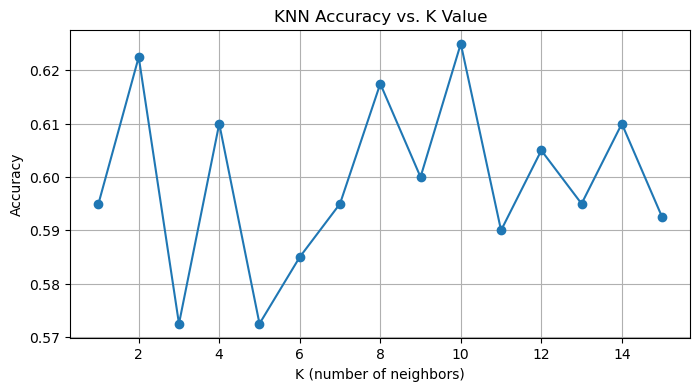

In [16]:
# Plot Accuracy vs K
k_vals = [r[0] for r in results]
acc_vals = [r[1] for r in results]

plt.figure(figsize=(8,4))
plt.plot(k_vals, acc_vals, marker='o')
plt.xlabel("K (number of neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. K Value")
plt.grid(True)
plt.show()

---
## Phase 3 — Final Model Using Best K

We choose the K value that produced the highest accuracy.  
Now we retrain KNN using that K and evaluate the confusion matrix.
---

In [19]:
# ------------------------------------------------------------
# Choose Best K
# ------------------------------------------------------------
best_k = max(results, key=lambda x: x[1])[0]
print("Best K =", best_k)

# Train final model
knn = KNNClassifier(k=best_k)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Accuracy
final_acc = accuracy(y_test, y_pred)
print(f"Final Test Accuracy: {final_acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

Best K = 10
Final Test Accuracy: 0.6250

Confusion Matrix:
 [[226  29]
 [121  24]]


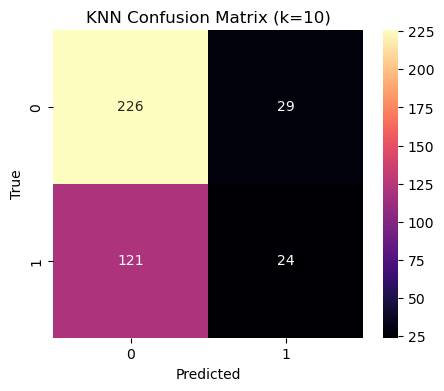

In [21]:
# ------------------------------------------------------------
# Confusion Matrix Heatmap
# ------------------------------------------------------------
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="g", cmap="magma")
plt.title(f"KNN Confusion Matrix (k={best_k})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 📊 Interpretation of KNN Results

K-Nearest Neighbors was applied to the Spotify Top Songs dataset (2000 tracks, 9 standardized audio features).  
The positive class (hit = popularity ≥ 70) makes up **36.35%** of the dataset, meaning the task is moderately imbalanced.

### **Model Behavior Across K Values**
Accuracy was tested for K = 1 to 15. Results ranged from **0.5725 to 0.6250**, with the best performance at:

**➡️ Best K = 10 (Accuracy = 0.6250)**

- Small K (1–3) → overfits noise  
- Large K → underfits  
- K = 10 provides the best balance between stability and flexibility

---

### **Final Model Performance**

Accuracy: 0.6250

Confusion Matrix:
[[226 29]
[121 24]]

### **Interpretation**
- The model accurately identifies **non-hit songs** (226) far more than **hit songs** (24).
- Over **80% of actual hits** were misclassified as non-hits.
- This suggests considerable overlap between hit and non-hit songs in audio feature space.

---

### **What This Suggests About Spotify Audio Features**
- Non-hits cluster more tightly, making them easier to classify correctly.
- Hits are widely dispersed and lack a strong, consistent acoustic pattern.
- Audio attributes (danceability, loudness, valence, tempo, etc.) are **not sufficient alone** to reliably distinguish hit songs.
- External factors (marketing, playlisting, artist fame) likely play a larger role in popularity.

---

### **Key Takeaways**
- KNN provides moderate performance but is limited by:
  - class imbalance  
  - overlapping feature distributions  
  - lack of strong acoustic signatures for hit songs
- The classifier favors the majority class, leading to poor recall for hits.
- Popularity is influenced by complex, non-acoustic factors KNN cannot capture.

---
